In [1]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd gdrive/My Drive/code/
    %cd photovoltaic_images
    root_folder = "/data"
else:
    print('Not running on CoLab')
    root_folder = "data"

Not running on CoLab


In [2]:
#!pip install git+https://github.com/tensorflow/examples.git

In [3]:
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz

In [4]:
#!pip install imantics

In [5]:
from pycocotools.coco import COCO
import numpy as np

import random
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pydot
from imantics import Polygons, Mask
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import cv2

## For visualizing results

import matplotlib.gridspec as gridspec
import sys
%matplotlib inline

In [6]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd gdrive/My Drive/code/photovoltaic_images
else:
  print('Not running on CoLab')

Not running on CoLab


In [7]:
random.seed(123)

In [8]:
from utils import *
from models.model import *
import rectification as rec

In [47]:
# Main Parameter
# Segmentation
model_name = 'vgg19'
EPOCHS = 1000

# Regression
nr_images_batch = 1000
nr_batch = 45
nr_epoch = 10

In [48]:
'models/' + str(model_name) + '_' + str(EPOCHS)

'models/vgg19_1000'

In [49]:
model = keras.models.load_model('models/' + str(model_name) + '_' + str(EPOCHS))

In [50]:
# Parameter
x = 192
y = 192

batch_size = 1
input_image_size = (x,y)
OUTPUT_CHANNELS = 1

folder = 'data/opti'


In [51]:
log = RuntimeLogger(".", model_name, EPOCHS)
log.start()

In [52]:
img = np.zeros((1, x, y, 3)).astype('float')

In [98]:
source = io.imread(folder + '/20161231_123535.jpg')
#source = io.imread('data/Rathausen_192x192/20210312_105818.jpg')

In [99]:
image = cv2.resize(source, (192,192))

In [100]:
img[0] = image

In [101]:
img.shape

(1, 192, 192, 3)

In [102]:
pred_mask.shape

(1, 192, 192, 1)

In [103]:
pred_mask = model.predict(img)

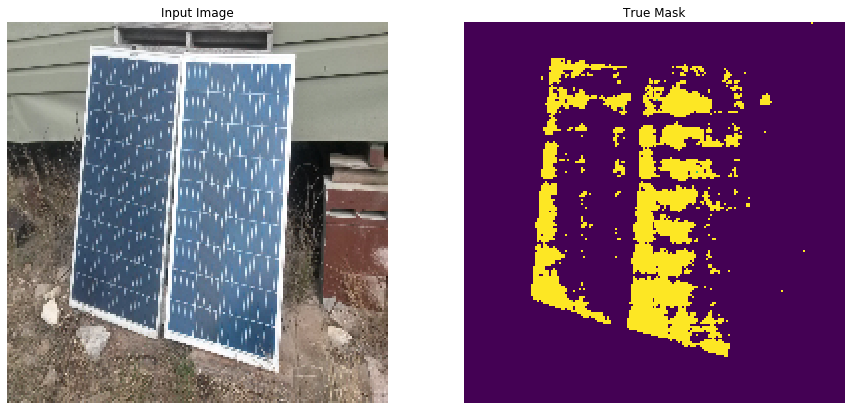

In [104]:
display([image,pred_mask[0]])

In [ ]:
outfile = folder + '/out.jpg'
outfile_mask = folder + '/out_mask.jpg'
save_img(outfile, image)
save_img(outfile_mask, pred_mask[0]) 

In [ ]:
outfile

In [ ]:
def show_predictions(model, dataset=None, num=4):
    """[summary]

    Args:
        dataset ([type], optional): [description]. Defaults to None.
        num (int, optional): [description]. Defaults to 4.
    """
    if dataset:
        for i in range(0, num):
            image, mask = next(dataset)
            pred_mask = model.predict(image)
            display([image[0], mask[0], pred_mask[0]])
    else:
        img = model.predict(sample_image)
        display([sample_image[0], sample_mask[0],
             img[0]])

## Evaluate Bildsegmentierung

# Store, Registration and Recification

In [ ]:
predict_and_store(model, model_name + str(EPOCHS), 'Rathausen_192x192', images_test, dataset_size_test, folder, x, y, root_folder)

In [ ]:
training_start_time = time()
predict_and_store(model, model_name + str(EPOCHS), 'DeepSolarEye_192x192', images_deepsolareye, dataset_size_deepsolareye, folder_deepsolareye, x, y, root_folder)
training_time = time() - training_start_time
log.log_task_end('predict_deepsolareye_time', training_start_time)
print("--- %s seconds ---" % (training_time))

# Regression

In [ ]:
# Make Regression on recification deep solar eye pictures
folder = "data/" + model_name + str(EPOCHS) + "/DeepSolarEye_192x192_rec"
#folder = "data/DeepSolarEyeCalc/DeepSolarEye_192x192_rec"

In [ ]:
folder

In [ ]:
training_start_time = time()
metrics = train_keras(model_name, folder, nr_images_batch, nr_batch, nr_epoch, 10)
training_time = time() - training_start_time
log.log_task_end('regression_time', training_start_time)
print("--- %s seconds ---" % (training_time))

## Evaluate Regression

In [ ]:
# Print Model Summary:
print("MODEL SUMMARY")
print("-------------")
print("Test MSE:", metrics[1])
print("Test RMSE:", metrics[2])
print("Test MAE:", metrics[3])


In [ ]:
# add Metric to the log
log.add_metric('Regression MSE', metrics[1])
log.add_metric('Regression RMSE', metrics[2])
log.add_metric('Regression MAE', metrics[3])

# End of Experiment

In [ ]:
log.log_experiment_end()